In [314]:
## HOW WE TRAINED THE MODEL 
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import re


from matplotlib import  style
style.use('ggplot')
#Text filtering + data cleaning
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
print(stopwords.fileids())
stop_words = set(stopwords.words('english'))
print(stop_words)
#Text Topics Visualization
from wordcloud import WordCloud

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']
{'needn', 'in', "isn't", 'have', "you'd", "you'll", 'those', 'same', 'o', 'but', 'with', 'it', 're', 'each', 'aren', "shouldn't", 'me', 'own', 'itself', 'such', 'when', 'being', "weren't", 'didn', 'shan', 'so', 'after', 'the', 've', 't', 'most', 'for', 'before', 'him', "she's", 'under', 'into', 'some', 'was', "that'll", 'her', 'yourself', 'themselves', "wouldn't", "won't", 'once', 'm', 'should', 'his', 'does', 'below', 'than', 'its', 'myself', 'doing', 'more', 'shouldn', 'our', 'is', 'can', 'i', 'don', 'through', 'who', 'has', "aren't", 'haven', 'between', "didn't", 'because', 'am', "needn't", 'himself', 'this', 'had', 'above', 'by', 'been', "mightn't", 'that', 'how', "haven't", 'here', "shan't", 'up', 'again', "don't", 'o

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## First Dataset

In [315]:
#LOADING DATA
train = pd.read_csv("train.csv")
train['label'] = train['label'].astype('category')
train.set_index('id')
print(train.isna().sum())
print(train.head(15))

id       0
label    0
tweet    0
dtype: int64
    id label                                              tweet
0    1     0   @user when a father is dysfunctional and is s...
1    2     0  @user @user thanks for #lyft credit i can't us...
2    3     0                                bihday your majesty
3    4     0  #model   i love u take with u all the time in ...
4    5     0             factsguide: society now    #motivation
5    6     0  [2/2] huge fan fare and big talking before the...
6    7     0   @user camping tomorrow @user @user @user @use...
7    8     0  the next school year is the year for exams.ð...
8    9     0  we won!!! love the land!!! #allin #cavs #champ...
9   10     0   @user @user welcome here !  i'm   it's so #gr...
10  11     0   â #ireland consumer price index (mom) climb...
11  12     0  we are so selfish. #orlando #standwithorlando ...
12  13     0  i get to see my daddy today!!   #80days #getti...
13  14     1  @user #cnn calls #michigan middle school 'bu

In [316]:
#try to get rid of stopwords & special characters
def data_processing(tweet):
    #modified textual data to lowercase data
    tweet=tweet.lower()
    #remove the url and hashtag using the regex func. 
    tweet=re.sub(r"https\S+|www\S+http\S+",'',tweet,flags = re.MULTILINE)
    tweet=re.sub(r'\@w+|\#','',tweet)
    tweet=re.sub(r'[^\w\s]','',tweet)
    tweet=re.sub(r'ð','',tweet)
    tweet=re.sub(r'user','',tweet)
    tweet = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]","",tweet)
    tweet = re.sub(r"[^a-zA-Z0-9]_\s-","",tweet)
    tweet = re.sub(r"amp","",tweet)

    tweet = re.sub(r"youre","",tweet)
    tweet = re.sub(r"via","",tweet)
    tweet = re.sub(r"im","",tweet)
    tweet = re.sub(" \d+", "", tweet)
    ##If you want to remove non-English characters then this regex will work, 
    # by selecting characters not in a given ASCII range 
    # (0 to 122, you can adjust this since it will allow some special characters)
    tweet = re.sub("([^\x00-\x7F])+","",tweet)
    tweet_tokens = word_tokenize(tweet)
    filter_tweet = [w for w in tweet_tokens if not w in stop_words]
    filter_tweet =[i for i in filter_tweet if not i.isdigit()]
    filter_tweet = [item for item in filter_tweet if not isinstance(item, int)]
    return " ".join(filter_tweet)
train.tweet = train['tweet'].apply(data_processing)    
train1 = train.drop_duplicates('tweet')
ps = PorterStemmer()
def stemmer(data):
    tweet = [ps.stem(word) for word in data]
    return data
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data
train1['tweet'] = train1['tweet'].apply(lambda x: stemmer(x))
train1['tweet'] = train1['tweet'].apply(lambda x: lemmatizing(x))
# also getting rid of all words shorter than 3 characters
train1['tweet_more_2_charac'] = train1['tweet'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))
train_pos = train1[train1["label"]==0]
train_pos


,id,label,tweet,tweet_more_2_charac
0,1,0,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday majesty,bihday majesty
3,4,0,model love u take u te ur,model love take
4,5,0,factsguide society motivation,factsguide society motivation
...,...,...,...,...
31956,31957,0,fishing tomorrow carnt wait first te years,fishing tomorrow carnt wait first years
31957,31958,0,ate isz youuu,ate isz youuu
31958,31959,0,see nina turner airwaves trying wrap mantle ge...,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening sad songs monday morning otw work sad,listening sad songs monday morning otw work sad


## set default + rearrange structure of the first dataset 

In [317]:
# recreating the same structure of the other df
train_pos.insert(1, 'count' ,3)
train_pos.insert(2,'hate_speech',0)
train_pos.insert(3,'offensive_language',0)
train_pos.insert(4,'neither',0)
train_pos.insert(5,'positive',3)
train_pos

,id,count,hate_speech,offensive_language,neither,positive,label,tweet,tweet_more_2_charac
0,1,3,0,0,0,3,0,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...
1,2,3,0,0,0,3,0,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...
2,3,3,0,0,0,3,0,bihday majesty,bihday majesty
3,4,3,0,0,0,3,0,model love u take u te ur,model love take
4,5,3,0,0,0,3,0,factsguide society motivation,factsguide society motivation
...,...,...,...,...,...,...,...,...,...
31956,31957,3,0,0,0,3,0,fishing tomorrow carnt wait first te years,fishing tomorrow carnt wait first years
31957,31958,3,0,0,0,3,0,ate isz youuu,ate isz youuu
31958,31959,3,0,0,0,3,0,see nina turner airwaves trying wrap mantle ge...,see nina turner airwaves trying wrap mantle ge...
31959,31960,3,0,0,0,3,0,listening sad songs monday morning otw work sad,listening sad songs monday morning otw work sad


In [318]:
# removing the existing label
train_pos.drop(['label'], axis = 1, inplace = True)
# inserting label as 4 for positive tweets
train_pos.insert(6,'class', 3)
train_pos

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac
0,1,3,0,0,0,3,3,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...
1,2,3,0,0,0,3,3,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...
2,3,3,0,0,0,3,3,bihday majesty,bihday majesty
3,4,3,0,0,0,3,3,model love u take u te ur,model love take
4,5,3,0,0,0,3,3,factsguide society motivation,factsguide society motivation
...,...,...,...,...,...,...,...,...,...
31956,31957,3,0,0,0,3,3,fishing tomorrow carnt wait first te years,fishing tomorrow carnt wait first years
31957,31958,3,0,0,0,3,3,ate isz youuu,ate isz youuu
31958,31959,3,0,0,0,3,3,see nina turner airwaves trying wrap mantle ge...,see nina turner airwaves trying wrap mantle ge...
31959,31960,3,0,0,0,3,3,listening sad songs monday morning otw work sad,listening sad songs monday morning otw work sad


In [319]:
# selecting only 23000 to have a balanced dataset
train_pos_balance = train_pos[:25000]
train_pos_balance.head(20)

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac
0,1,3,0,0,0,3,3,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...
1,2,3,0,0,0,3,3,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...
2,3,3,0,0,0,3,3,bihday majesty,bihday majesty
3,4,3,0,0,0,3,3,model love u take u te ur,model love take
4,5,3,0,0,0,3,3,factsguide society motivation,factsguide society motivation
5,6,3,0,0,0,3,3,huge fan fare big talking leave chaos pay disp...,huge fan fare big talking leave chaos pay disp...
6,7,3,0,0,0,3,3,cing tomorrow danny,cing tomorrow danny
7,8,3,0,0,0,3,3,next school year year exams cant think school ...,next school year year exams cant think school ...
8,9,3,0,0,0,3,3,love land allin cavs chions cleveland clevelan...,love land allin cavs chions cleveland clevelan...
9,10,3,0,0,0,3,3,welcome gr8,welcome gr8


# Second Dataset

In [320]:
df = pd.read_csv('labeled_data.csv')
print(df.isna().sum())
print(df.head())

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [321]:
#try to get rid of stopwords & special characters
def data_processing(tweet):
    #modified textual data to lowercase data
    tweet=tweet.lower()
    #remove the url and hashtag using the regex func. 
    tweet=re.sub(r"https\S+|www\S+http\S+",'',tweet,flags = re.MULTILINE)
    tweet=re.sub(r'\@w+|\#','',tweet)
    tweet=re.sub(r'[^\w\s]','',tweet)
    tweet=re.sub(r'ð','',tweet)
    tweet=re.sub(r'user','',tweet)
    tweet = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]","",tweet)
    tweet = re.sub(r"[^a-zA-Z0-9]_\s-","",tweet)
    tweet = re.sub(r"amp","",tweet)

    tweet = re.sub(r"youre","",tweet)
    tweet = re.sub(r"via","",tweet)
    tweet = re.sub(r"im","",tweet)
    
    tweet = re.sub(" \d+", "", tweet)
    ##If you want to remove non-English characters then this regex will work, 
    # by selecting characters not in a given ASCII range 
    # (0 to 122, you can adjust this since it will allow some special characters)
    tweet = re.sub("([^\x00-\x7F])+","",tweet)
    tweet_tokens = word_tokenize(tweet)
    filter_tweet = [w for w in tweet_tokens if not w in stop_words]
    filter_tweet =[i for i in filter_tweet if not i.isdigit()]
    filter_tweet = [item for item in filter_tweet if not isinstance(item, int)]
    return " ".join(filter_tweet)
df.tweet = df['tweet'].apply(data_processing)    
df1 = df.drop_duplicates('tweet')
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data
def stemmer(data):
    tweet = [ps.stem(word) for word in data]
    return data
df1['tweet'] = df1['tweet'].apply(lambda x: lemmatizing(x))
df1['tweet'] = df1['tweet'].apply(lambda x: stemmer(x))
# also getting rid of all words shorter than 3 characters
df1['tweet_more_2_charac'] = df1['tweet'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))
# renaming the first columns as id
df1.rename(columns={'Unnamed: 0':'id'}, inplace = True)
df1

,id,count,hate_speech,offensive_language,neither,class,tweet,tweet_more_2_charac
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...,mayasolovely woman shouldnt complain cleaning ...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...,mleew17 boy dats coldtyga dwn bad cuffin dat h...
2,2,3,0,3,0,1,rt urkindofbrand dawg rtsbaby4life ever fuck b...,urkindofbrand dawg rtsbaby4life ever fuck bitc...
3,3,3,0,2,1,1,rt c_g_anderson viva_based look like tranny,c_g_anderson viva_based look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...,shenikaroberts shit hear might true might fake...
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,yous muthafin lielifeasking_pearls corey_emanu...,yous muthafin lielifeasking_pearls corey_emanu...
24779,25292,3,0,1,2,2,youve gone broke wrong heart baby drove rednec...,youve gone broke wrong heart baby drove rednec...
24780,25294,3,0,3,0,1,young buck wan na eat dat nigguh like aint fuc...,young buck wan eat dat nigguh like aint fuckin...
24781,25295,6,0,6,0,1,youu got wild bitches tellin lies,youu got wild bitches tellin lies


1) count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).
2) hate_speech = number of CF users who judged the tweet to be hate speech.
3) offensive_language = number of CF users who judged the tweet to be offensive.


4.neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.

5.class = class label for majority of CF users. 0 - **hate speech** / 1 - **offensive language** / 2 - **neither**

6.tweet = content of the tweet

In [322]:
# there are three different classes on this dataset, all of which vaguely or clearly offensive
df1['class'].value_counts()
#0 - **hate speech** / 1 - **offensive language** / 2 - **neither**

1    19069
2     4157
0     1425
Name: class, dtype: int64

In [323]:
# racist or homophobic comments
hate_speech = df1[df1['class']==0] 
hate_speech.head(10)

,id,count,hate_speech,offensive_language,neither,class,tweet,tweet_more_2_charac
85,85,3,2,1,0,0,blackman38tide halelookyhere howdydowdy11 quee...,blackman38tide halelookyhere howdydowdy11 quee...
89,90,3,3,0,0,0,cb_baby24 hite_thunduh alsarabsss hes beaner s...,cb_baby24 hite_thunduh alsarabsss hes beaner s...
110,111,3,3,0,0,0,devilgrz vigxrarts fucking gay blacklisted hoe...,devilgrz vigxrarts fucking gay blacklisted hoe...
184,186,3,3,0,0,0,markroundtreejr lmfaoooo hate black people the...,markroundtreejr lmfaoooo hate black people the...
202,204,3,2,1,0,0,nochillpaz least nigger httptcorgja7cfoit lmfao,nochillpaz least nigger httptcorgja7cfoit lmfao
204,206,3,2,1,0,0,notoriousbm95 _whiteponyjr_ ariza snake coward...,notoriousbm95 _whiteponyjr_ ariza snake coward...
219,221,6,3,2,1,0,rtnba drakes new shoes released nikejordan yes...,rtnba drakes new shoes released nikejordan yes...
260,263,3,2,1,0,0,theomaxxus gerryshalloweenparty httptco3ycrsrn...,theomaxxus gerryshalloweenparty httptco3ycrsrn...
312,317,3,2,1,0,0,ashlingwilde itsnotadam bored supposed cute fa...,ashlingwilde itsnotadam bored supposed cute fa...
315,320,3,2,1,0,0,bigbootybishopp hite_thunduh lassen cc coach w...,bigbootybishopp hite_thunduh lassen coach want...


In [324]:
hate_speech['count'].value_counts()

3    1379
6      29
9       9
4       7
7       1
Name: count, dtype: int64

In [325]:
# offensive but not hate speech
offensive_language = df1[df1['class']==1]
offensive_language 

,id,count,hate_speech,offensive_language,neither,class,tweet,tweet_more_2_charac
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...,mleew17 boy dats coldtyga dwn bad cuffin dat h...
2,2,3,0,3,0,1,rt urkindofbrand dawg rtsbaby4life ever fuck b...,urkindofbrand dawg rtsbaby4life ever fuck bitc...
3,3,3,0,2,1,1,rt c_g_anderson viva_based look like tranny,c_g_anderson viva_based look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...,shenikaroberts shit hear might true might fake...
5,5,3,1,2,0,1,t_madison_x shit blows mecla faithful somebody...,t_madison_x shit blows mecla faithful somebody...
...,...,...,...,...,...,...,...,...
24774,25287,3,0,3,0,1,really care bout dis bitch dick yo feelings,really care bout dis bitch dick feelings
24775,25288,3,0,3,0,1,worried bout bitches need,worried bout bitches need
24778,25291,3,0,2,1,1,yous muthafin lielifeasking_pearls corey_emanu...,yous muthafin lielifeasking_pearls corey_emanu...
24780,25294,3,0,3,0,1,young buck wan na eat dat nigguh like aint fuc...,young buck wan eat dat nigguh like aint fuckin...


In [326]:
offensive_language['count'].value_counts()

3    17401
6     1342
4      167
9      138
7       21
Name: count, dtype: int64

In [327]:
# neither offensive nor non-offensive speech
neutral = df1[df1['class']== 2] 
neutral 

,id,count,hate_speech,offensive_language,neither,class,tweet,tweet_more_2_charac
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...,mayasolovely woman shouldnt complain cleaning ...
40,40,3,0,1,2,2,momma said pussy cats inside doghouse,momma said pussy cats inside doghouse
63,63,3,0,0,3,2,addicted2guys splyaddictedtoguys httptco1jl4hi...,addicted2guys splyaddictedtoguys httptco1jl4hi...
66,66,3,0,1,2,2,allaboutmanfeet httptco3gzupfumev woof woof ho...,allaboutmanfeet httptco3gzupfumev woof woof ho...
67,67,3,0,1,2,2,allyhaaaaa lemmie eat oreo dishes one oreo lol,allyhaaaaa lemmie eat oreo dishes one oreo lol
...,...,...,...,...,...,...,...,...
24736,25249,3,0,0,3,2,yaya ho cute avi tho rt vivala_ari idea sleep,yaya cute avi tho vivala_ari idea sleep
24737,25250,3,0,1,2,2,yea n_tel new friend friends kno theyre allowe...,yea n_tel new friend friends kno theyre allowe...
24767,25280,3,0,1,2,2,know say early bird gets worm puts gummy worms...,know say early bird gets worm puts gummy worms...
24779,25292,3,0,1,2,2,youve gone broke wrong heart baby drove rednec...,youve gone broke wrong heart baby drove rednec...


In [328]:
neutral['count'].value_counts()

3    3913
6     184
4      37
9      19
7       4
Name: count, dtype: int64

In [329]:
# inserting a new column in our dataframe to account for positive tweets (which we will extract in teh following section)
df1.insert(5, 'positive' ,0)
df1

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac
0,0,3,0,0,3,0,2,rt mayasolovely woman shouldnt complain cleani...,mayasolovely woman shouldnt complain cleaning ...
1,1,3,0,3,0,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...,mleew17 boy dats coldtyga dwn bad cuffin dat h...
2,2,3,0,3,0,0,1,rt urkindofbrand dawg rtsbaby4life ever fuck b...,urkindofbrand dawg rtsbaby4life ever fuck bitc...
3,3,3,0,2,1,0,1,rt c_g_anderson viva_based look like tranny,c_g_anderson viva_based look like tranny
4,4,6,0,6,0,0,1,rt shenikaroberts shit hear might true might f...,shenikaroberts shit hear might true might fake...
...,...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,0,1,yous muthafin lielifeasking_pearls corey_emanu...,yous muthafin lielifeasking_pearls corey_emanu...
24779,25292,3,0,1,2,0,2,youve gone broke wrong heart baby drove rednec...,youve gone broke wrong heart baby drove rednec...
24780,25294,3,0,3,0,0,1,young buck wan na eat dat nigguh like aint fuc...,young buck wan eat dat nigguh like aint fuckin...
24781,25295,6,0,6,0,0,1,youu got wild bitches tellin lies,youu got wild bitches tellin lies


In [330]:
df1['positive'].value_counts()

0    24651
Name: positive, dtype: int64

In [331]:
df1['id'] = df1['id'] + 31963

# the third dataset

In [332]:
#LOADING DATA
import pandas as pd
dttrain = pd.read_csv("2020-12-31-DynamicallyGeneratedHateDataset-entries-v0.1.csv")

In [333]:
dttrain['label'] = dttrain['label'].replace("nothate", 0)
dttrain['label'] = dttrain['label'].replace("hate", 1)
dttrain = dttrain.rename(columns={'text': 'tweet'})

In [334]:
dttrain.drop(['id','type','model_wrong',
         'db.model_preds','status', 'round','split', 'annotator'], axis = 1, inplace=True)
dttrain

,Unnamed: 0,tweet,label
0,1,It should be legal for a husband to rape his wife,1
1,2,dalits are lowlife scum,1
2,3,dalits are lowlives,1
3,4,It was a better world when women dare not ques...,1
4,5,I don't work this hard so that those immigrant...,1
...,...,...,...
40618,40736,we should forcibly remove all the foreigners f...,1
40619,40737,we should forcibly remove all the immigrants f...,1
40620,40738,dalits are unworthy of the Gods love,1
40621,40739,dalits are worthless,1


In [335]:
#try to get rid of stopwords & special characters
def data_processing(tweet):
    #modified textual data to lowercase data
    tweet=tweet.lower()
    #remove the url and hashtag using the regex func. 
    tweet=re.sub(r"https\S+|www\S+http\S+",'',tweet,flags = re.MULTILINE)
    tweet=re.sub(r'\@w+|\#','',tweet)
    tweet=re.sub(r'[^\w\s]','',tweet)
    tweet=re.sub(r'ð','',tweet)
    tweet=re.sub(r'user','',tweet)
    tweet = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]","",tweet)
    tweet = re.sub(r"[^a-zA-Z0-9]_\s-","",tweet)
    tweet = re.sub(r"amp","",tweet)

    tweet = re.sub(r"youre","",tweet)
    tweet = re.sub(r"via","",tweet)
    tweet = re.sub(r"im","",tweet)
    tweet = re.sub(" \d+", "", tweet)
    ##If you want to remove non-English characters then this regex will work, 
    # by selecting characters not in a given ASCII range 
    # (0 to 122, you can adjust this since it will allow some special characters)
    tweet = re.sub("([^\x00-\x7F])+","",tweet)
    tweet_tokens = word_tokenize(tweet)
    filter_tweet = [w for w in tweet_tokens if not w in stop_words]
    filter_tweet =[i for i in filter_tweet if not i.isdigit()]
    filter_tweet = [item for item in filter_tweet if not isinstance(item, int)]
    return " ".join(filter_tweet)
dttrain.tweet = dttrain['tweet'].apply(data_processing)    
dttrain1 = dttrain.drop_duplicates('tweet')
ps = PorterStemmer()
def stemmer(data):
    tweet = [ps.stem(word) for word in data]
    return data
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data
dttrain1['tweet'] = dttrain1['tweet'].apply(lambda x: stemmer(x))
dttrain1['tweet'] = dttrain1['tweet'].apply(lambda x: lemmatizing(x))
# also getting rid of all words shorter than 3 characters
dttrain1['tweet_more_2_charac'] = dttrain1['tweet'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))
dttrain1.rename(columns={'Unnamed: 0':'id'}, inplace = True)
dttrain1

,id,tweet,label,tweet_more_2_charac
0,1,legal husband rape wife,1,legal husband rape wife
1,2,dalits lowlife scum,1,dalits lowlife scum
2,3,dalits lowlives,1,dalits lowlives
3,4,better world women dare question men,1,better world women dare question men
4,5,dont work hard migrants take benefits,1,dont work hard migrants take benefits
...,...,...,...,...
40618,40736,forcibly remove foreigners,1,forcibly remove foreigners
40619,40737,forcibly remove migrants,1,forcibly remove migrants
40620,40738,dalits unworthy gods love,1,dalits unworthy gods love
40621,40739,dalits worthless,1,dalits worthless


In [336]:
# recreating the same structure of the other df
dttrain1.insert(1, 'count' ,3)
dttrain1.insert(2,'hate_speech',0)
dttrain1.insert(3,'offensive_language',0)
dttrain1.insert(4,'neither',0)
dttrain1.insert(5,'positive',3)
dttrain1

,id,count,hate_speech,offensive_language,neither,positive,tweet,label,tweet_more_2_charac
0,1,3,0,0,0,3,legal husband rape wife,1,legal husband rape wife
1,2,3,0,0,0,3,dalits lowlife scum,1,dalits lowlife scum
2,3,3,0,0,0,3,dalits lowlives,1,dalits lowlives
3,4,3,0,0,0,3,better world women dare question men,1,better world women dare question men
4,5,3,0,0,0,3,dont work hard migrants take benefits,1,dont work hard migrants take benefits
...,...,...,...,...,...,...,...,...,...
40618,40736,3,0,0,0,3,forcibly remove foreigners,1,forcibly remove foreigners
40619,40737,3,0,0,0,3,forcibly remove migrants,1,forcibly remove migrants
40620,40738,3,0,0,0,3,dalits unworthy gods love,1,dalits unworthy gods love
40621,40739,3,0,0,0,3,dalits worthless,1,dalits worthless


In [337]:
no_hate = dttrain1[dttrain1['label']==0]
no_hate.drop(columns='label',inplace=True)
# inserting label as 4 for positive tweets
no_hate.insert(6,'class', 3)
no_hate = no_hate.drop([26,40540])
no_hate = no_hate.reset_index(drop=True)
no_hate.drop(columns='id',inplace=True)
no_hate = no_hate.rename_axis('id').reset_index()
no_hate

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac
0,0,3,0,0,0,3,3,dont hate musls,dont hate musls
1,1,3,0,0,0,3,3,dont hatefucking islam,dont hatefucking islam
2,2,3,0,0,0,3,3,dont hate fucking musls,dont hate fucking musls
3,3,3,0,0,0,3,3,world full women unfair,world full women unfair
4,4,3,0,0,0,3,3,government incompetent,government incompetent
...,...,...,...,...,...,...,...,...,...
17972,17972,3,0,0,0,3,3,think blacks violent thieves,think blacks violent thieves
17973,17973,3,0,0,0,3,3,meal disgusting wan na die,meal disgusting wan die
17974,17974,3,0,0,0,3,3,apartment full rats disgusting,apartment full rats disgusting
17975,17975,3,0,0,0,3,3,street full rats appalling,street full rats appalling


In [338]:
no_hate['id'] = no_hate['id'] + 57260

In [339]:
no_hate

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac
0,57260,3,0,0,0,3,3,dont hate musls,dont hate musls
1,57261,3,0,0,0,3,3,dont hatefucking islam,dont hatefucking islam
2,57262,3,0,0,0,3,3,dont hate fucking musls,dont hate fucking musls
3,57263,3,0,0,0,3,3,world full women unfair,world full women unfair
4,57264,3,0,0,0,3,3,government incompetent,government incompetent
...,...,...,...,...,...,...,...,...,...
17972,75232,3,0,0,0,3,3,think blacks violent thieves,think blacks violent thieves
17973,75233,3,0,0,0,3,3,meal disgusting wan na die,meal disgusting wan die
17974,75234,3,0,0,0,3,3,apartment full rats disgusting,apartment full rats disgusting
17975,75235,3,0,0,0,3,3,street full rats appalling,street full rats appalling


In [340]:
hate = dttrain1[dttrain1['label']==1]
hate.drop(columns='label',inplace=True)
# inserting label as 4 for hate tweets
hate.insert(6,'class', 1)
hate = hate.drop([0,40622])
hate = hate.reset_index(drop=True)
hate.drop(columns='id',inplace=True)
hate = hate.rename_axis('id').reset_index()
hate

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac
0,0,3,0,0,0,3,1,dalits lowlife scum,dalits lowlife scum
1,1,3,0,0,0,3,1,dalits lowlives,dalits lowlives
2,2,3,0,0,0,3,1,better world women dare question men,better world women dare question men
3,3,3,0,0,0,3,1,dont work hard migrants take benefits,dont work hard migrants take benefits
4,4,3,0,0,0,3,1,dont work hard foreigners take benefits,dont work hard foreigners take benefits
...,...,...,...,...,...,...,...,...,...
21693,21693,3,0,0,0,3,1,women hysterical,women hysterical
21694,21694,3,0,0,0,3,1,forcibly remove foreigners,forcibly remove foreigners
21695,21695,3,0,0,0,3,1,forcibly remove migrants,forcibly remove migrants
21696,21696,3,0,0,0,3,1,dalits unworthy gods love,dalits unworthy gods love


In [341]:
hate['id'] = hate['id'] + 75698

In [342]:
hate

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac
0,75698,3,0,0,0,3,1,dalits lowlife scum,dalits lowlife scum
1,75699,3,0,0,0,3,1,dalits lowlives,dalits lowlives
2,75700,3,0,0,0,3,1,better world women dare question men,better world women dare question men
3,75701,3,0,0,0,3,1,dont work hard migrants take benefits,dont work hard migrants take benefits
4,75702,3,0,0,0,3,1,dont work hard foreigners take benefits,dont work hard foreigners take benefits
...,...,...,...,...,...,...,...,...,...
21693,97391,3,0,0,0,3,1,women hysterical,women hysterical
21694,97392,3,0,0,0,3,1,forcibly remove foreigners,forcibly remove foreigners
21695,97393,3,0,0,0,3,1,forcibly remove migrants,forcibly remove migrants
21696,97394,3,0,0,0,3,1,dalits unworthy gods love,dalits unworthy gods love


## Concatenation 3 Datasets (4 sub-datasets)

In [343]:
df = pd.concat([train_pos_balance,df1,no_hate,hate], join = 'inner')
df

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac
0,1,3,0,0,0,3,3,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...
1,2,3,0,0,0,3,3,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...
2,3,3,0,0,0,3,3,bihday majesty,bihday majesty
3,4,3,0,0,0,3,3,model love u take u te ur,model love take
4,5,3,0,0,0,3,3,factsguide society motivation,factsguide society motivation
...,...,...,...,...,...,...,...,...,...
21693,97391,3,0,0,0,3,1,women hysterical,women hysterical
21694,97392,3,0,0,0,3,1,forcibly remove foreigners,forcibly remove foreigners
21695,97393,3,0,0,0,3,1,forcibly remove migrants,forcibly remove migrants
21696,97394,3,0,0,0,3,1,dalits unworthy gods love,dalits unworthy gods love


In [344]:
df.set_index('id')


,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac
id,,,,,,,,
1,3,0,0,0,3,3,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...
2,3,0,0,0,3,3,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...
3,3,0,0,0,3,3,bihday majesty,bihday majesty
4,3,0,0,0,3,3,model love u take u te ur,model love take
5,3,0,0,0,3,3,factsguide society motivation,factsguide society motivation
...,...,...,...,...,...,...,...,...
97391,3,0,0,0,3,1,women hysterical,women hysterical
97392,3,0,0,0,3,1,forcibly remove foreigners,forcibly remove foreigners
97393,3,0,0,0,3,1,forcibly remove migrants,forcibly remove migrants


In [345]:
# the final dataset has a good balance between positive(3) and negatives tweets(0)
df['positive'].value_counts()

3    64675
0    24651
Name: positive, dtype: int64

In [346]:
# reshuffling the rows
#df = df.sample(frac=1, random_state=43).reset_index(drop=True)

In [347]:
def remove_pattern(input_txt, pattern):
    
    """ Function replacing a specific regex pattern with an empty space"""
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    


In [348]:
retweet =  df[df['tweet_more_2_charac'].str.contains(r'http://t(?!$)')]
retweet

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac


In [349]:
# pattern to delete URLS for RETWEETS
df['no_url'] = np.vectorize(remove_pattern)(df['tweet_more_2_charac'], "https?://[A-Za-z0-9./]*")

In [350]:
# checking whether URLS have been removed
df

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac,no_url
0,1,3,0,0,0,3,3,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...
1,2,3,0,0,0,3,3,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...
2,3,3,0,0,0,3,3,bihday majesty,bihday majesty,bihday majesty
3,4,3,0,0,0,3,3,model love u take u te ur,model love take,model love take
4,5,3,0,0,0,3,3,factsguide society motivation,factsguide society motivation,factsguide society motivation
...,...,...,...,...,...,...,...,...,...,...
21693,97391,3,0,0,0,3,1,women hysterical,women hysterical,women hysterical
21694,97392,3,0,0,0,3,1,forcibly remove foreigners,forcibly remove foreigners,forcibly remove foreigners
21695,97393,3,0,0,0,3,1,forcibly remove migrants,forcibly remove migrants,forcibly remove migrants
21696,97394,3,0,0,0,3,1,dalits unworthy gods love,dalits unworthy gods love,dalits unworthy gods love


In [351]:
def counting(input_txt, pattern):
    
    """Simple function returning the pattern count instances in each tweet"""
    r = re.findall(pattern, input_txt)
    return len(r)


In [352]:
#ชื่อผู้ใช้ Twitter 
df['handle_count'] = np.vectorize(counting)(df['tweet_more_2_charac'], "@[\w]*")


In [353]:
# the majority of tweets had no handles
df['handle_count'].value_counts()

0    89326
Name: handle_count, dtype: int64

In [354]:
# counting the length of tweets after URLs are removed, we will use this to see if there's a correlation between length of tweets and sentiment
df['tweet_length'] = df['no_url'].apply(lambda x: len(x))
df

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac,no_url,handle_count,tweet_length
0,1,3,0,0,0,3,3,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,0,55
1,2,3,0,0,0,3,3,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,0,87
2,3,3,0,0,0,3,3,bihday majesty,bihday majesty,bihday majesty,0,14
3,4,3,0,0,0,3,3,model love u take u te ur,model love take,model love take,0,15
4,5,3,0,0,0,3,3,factsguide society motivation,factsguide society motivation,factsguide society motivation,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
21693,97391,3,0,0,0,3,1,women hysterical,women hysterical,women hysterical,0,16
21694,97392,3,0,0,0,3,1,forcibly remove foreigners,forcibly remove foreigners,forcibly remove foreigners,0,26
21695,97393,3,0,0,0,3,1,forcibly remove migrants,forcibly remove migrants,forcibly remove migrants,0,24
21696,97394,3,0,0,0,3,1,dalits unworthy gods love,dalits unworthy gods love,dalits unworthy gods love,0,25


Checking max length for Tweets should be **280**


In [355]:
df_sub = df.loc[df['tweet_length']>280]
df_sub.sort_values(by=['tweet_length'], ascending = False)
df_sub.value_counts()

id     count  hate_speech  offensive_language  neither  positive  class  tweet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     tweet_more_2_charac                                                                  

OKAY!


In [356]:
# removing spaces in tweets to count only characters
df['nospaces'] = df['no_url'].str.replace(" ", "")
df['character_count'] = df['nospaces'].apply(lambda x: len(x))
df.head(50)

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac,no_url,handle_count,tweet_length,nospaces,character_count
0,1,3,0,0,0,3,3,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,0,55,fatherdysfunctionalselfishdragskidsdysfunctionrun,49
1,2,3,0,0,0,3,3,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,0,87,thankslyftcreditcantusecausedontofferwheelchai...,75
2,3,3,0,0,0,3,3,bihday majesty,bihday majesty,bihday majesty,0,14,bihdaymajesty,13
3,4,3,0,0,0,3,3,model love u take u te ur,model love take,model love take,0,15,modellovetake,13
4,5,3,0,0,0,3,3,factsguide society motivation,factsguide society motivation,factsguide society motivation,0,29,factsguidesocietymotivation,27
5,6,3,0,0,0,3,3,huge fan fare big talking leave chaos pay disp...,huge fan fare big talking leave chaos pay disp...,huge fan fare big talking leave chaos pay disp...,0,69,hugefanfarebigtalkingleavechaospaydisputesgeta...,59
6,7,3,0,0,0,3,3,cing tomorrow danny,cing tomorrow danny,cing tomorrow danny,0,19,cingtomorrowdanny,17
7,8,3,0,0,0,3,3,next school year year exams cant think school ...,next school year year exams cant think school ...,next school year year exams cant think school ...,0,95,nextschoolyearyearexamscantthinkschoolexamshat...,82
8,9,3,0,0,0,3,3,love land allin cavs chions cleveland clevelan...,love land allin cavs chions cleveland clevelan...,love land allin cavs chions cleveland clevelan...,0,56,lovelandallincavschionsclevelandclevelandcaval...,50
9,10,3,0,0,0,3,3,welcome gr8,welcome gr8,welcome gr8,0,11,welcomegr8,10


In [357]:
def lemmatize_sentence(sentence):
    
    """Function to lemmatize with POS all tweets"""
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
            # 'ass' kept being reduced to 'as' for some reason         
        if word == 'ass':
            lemmatized_sentence.append(word)
        
        elif tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


In [358]:

import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [359]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    
    """ Function defining the actual part of speech as adjective, 
    verb, noun or adverb"""
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [360]:
# for the lemmatizer function
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()

In [361]:
df['lemmatized'] = df['no_url'].apply(lambda x: lemmatize_sentence(x))

In [362]:
df.head(10)

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac,no_url,handle_count,tweet_length,nospaces,character_count,lemmatized
0,1,3,0,0,0,3,3,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,0,55,fatherdysfunctionalselfishdragskidsdysfunctionrun,49,father dysfunctional selfish drag kid dysfunct...
1,2,3,0,0,0,3,3,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,0,87,thankslyftcreditcantusecausedontofferwheelchai...,75,thanks lyft credit cant use cause dont offer w...
2,3,3,0,0,0,3,3,bihday majesty,bihday majesty,bihday majesty,0,14,bihdaymajesty,13,bihday majesty
3,4,3,0,0,0,3,3,model love u take u te ur,model love take,model love take,0,15,modellovetake,13,model love take
4,5,3,0,0,0,3,3,factsguide society motivation,factsguide society motivation,factsguide society motivation,0,29,factsguidesocietymotivation,27,factsguide society motivation
5,6,3,0,0,0,3,3,huge fan fare big talking leave chaos pay disp...,huge fan fare big talking leave chaos pay disp...,huge fan fare big talking leave chaos pay disp...,0,69,hugefanfarebigtalkingleavechaospaydisputesgeta...,59,huge fan fare big talk leave chaos pay dispute...
6,7,3,0,0,0,3,3,cing tomorrow danny,cing tomorrow danny,cing tomorrow danny,0,19,cingtomorrowdanny,17,cing tomorrow danny
7,8,3,0,0,0,3,3,next school year year exams cant think school ...,next school year year exams cant think school ...,next school year year exams cant think school ...,0,95,nextschoolyearyearexamscantthinkschoolexamshat...,82,next school year year exams cant think school ...
8,9,3,0,0,0,3,3,love land allin cavs chions cleveland clevelan...,love land allin cavs chions cleveland clevelan...,love land allin cavs chions cleveland clevelan...,0,56,lovelandallincavschionsclevelandclevelandcaval...,50,love land allin cavs chions cleveland clevelan...
9,10,3,0,0,0,3,3,welcome gr8,welcome gr8,welcome gr8,0,11,welcomegr8,10,welcome gr8


In [363]:
# removing spaces in between ashtags and words
df['lemmatized_1'] = df['lemmatized'].str.replace('# ', '#')
df.head(5)

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac,no_url,handle_count,tweet_length,nospaces,character_count,lemmatized,lemmatized_1
0,1,3,0,0,0,3,3,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,0,55,fatherdysfunctionalselfishdragskidsdysfunctionrun,49,father dysfunctional selfish drag kid dysfunct...,father dysfunctional selfish drag kid dysfunct...
1,2,3,0,0,0,3,3,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,0,87,thankslyftcreditcantusecausedontofferwheelchai...,75,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...
2,3,3,0,0,0,3,3,bihday majesty,bihday majesty,bihday majesty,0,14,bihdaymajesty,13,bihday majesty,bihday majesty
3,4,3,0,0,0,3,3,model love u take u te ur,model love take,model love take,0,15,modellovetake,13,model love take,model love take
4,5,3,0,0,0,3,3,factsguide society motivation,factsguide society motivation,factsguide society motivation,0,29,factsguidesocietymotivation,27,factsguide society motivation,factsguide society motivation


In [364]:
df['lemmatized_final'] = df['lemmatized'].str.replace(" '" ,"'")
df.head(5)

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac,no_url,handle_count,tweet_length,nospaces,character_count,lemmatized,lemmatized_1,lemmatized_final
0,1,3,0,0,0,3,3,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,0,55,fatherdysfunctionalselfishdragskidsdysfunctionrun,49,father dysfunctional selfish drag kid dysfunct...,father dysfunctional selfish drag kid dysfunct...,father dysfunctional selfish drag kid dysfunct...
1,2,3,0,0,0,3,3,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,0,87,thankslyftcreditcantusecausedontofferwheelchai...,75,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...
2,3,3,0,0,0,3,3,bihday majesty,bihday majesty,bihday majesty,0,14,bihdaymajesty,13,bihday majesty,bihday majesty,bihday majesty
3,4,3,0,0,0,3,3,model love u take u te ur,model love take,model love take,0,15,modellovetake,13,model love take,model love take,model love take
4,5,3,0,0,0,3,3,factsguide society motivation,factsguide society motivation,factsguide society motivation,0,29,factsguidesocietymotivation,27,factsguide society motivation,factsguide society motivation,factsguide society motivation


In [365]:
# there are three different classes on this dataset, all of which vaguely or clearly offensive
df['class'].value_counts()
#0 - **hate speech** / 1 - **offensive language** / 2 - **neither**/3 -**POSITIVE ONLY**

3    42977
1    40767
2     4157
0     1425
Name: class, dtype: int64

In [366]:
# excluding neutral tweets 
df = df.loc[df['class'] !=2 ]
df

,id,count,hate_speech,offensive_language,neither,positive,class,tweet,tweet_more_2_charac,no_url,handle_count,tweet_length,nospaces,character_count,lemmatized,lemmatized_1,lemmatized_final
0,1,3,0,0,0,3,3,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...,0,55,fatherdysfunctionalselfishdragskidsdysfunctionrun,49,father dysfunctional selfish drag kid dysfunct...,father dysfunctional selfish drag kid dysfunct...,father dysfunctional selfish drag kid dysfunct...
1,2,3,0,0,0,3,3,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,0,87,thankslyftcreditcantusecausedontofferwheelchai...,75,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...,thanks lyft credit cant use cause dont offer w...
2,3,3,0,0,0,3,3,bihday majesty,bihday majesty,bihday majesty,0,14,bihdaymajesty,13,bihday majesty,bihday majesty,bihday majesty
3,4,3,0,0,0,3,3,model love u take u te ur,model love take,model love take,0,15,modellovetake,13,model love take,model love take,model love take
4,5,3,0,0,0,3,3,factsguide society motivation,factsguide society motivation,factsguide society motivation,0,29,factsguidesocietymotivation,27,factsguide society motivation,factsguide society motivation,factsguide society motivation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21693,97391,3,0,0,0,3,1,women hysterical,women hysterical,women hysterical,0,16,womenhysterical,15,woman hysterical,woman hysterical,woman hysterical
21694,97392,3,0,0,0,3,1,forcibly remove foreigners,forcibly remove foreigners,forcibly remove foreigners,0,26,forciblyremoveforeigners,24,forcibly remove foreigner,forcibly remove foreigner,forcibly remove foreigner
21695,97393,3,0,0,0,3,1,forcibly remove migrants,forcibly remove migrants,forcibly remove migrants,0,24,forciblyremovemigrants,22,forcibly remove migrant,forcibly remove migrant,forcibly remove migrant
21696,97394,3,0,0,0,3,1,dalits unworthy gods love,dalits unworthy gods love,dalits unworthy gods love,0,25,dalitsunworthygodslove,22,dalits unworthy god love,dalits unworthy god love,dalits unworthy god love


In [367]:
df['class'].value_counts()

3    42977
1    40767
0     1425
Name: class, dtype: int64

In [368]:
#remove neutral & sum offensive(1)+hate speech(0) = negative (1) and positive(0)
df['label'] = df['class'].apply(lambda x: 0 if x == 3 else 1)
df['label'].value_counts()

0    42977
1    42192
Name: label, dtype: int64

In [369]:
df.drop(['count','hate_speech','offensive_language','neither',
         'positive','class', 'tweet','no_url', 'handle_count','tweet_more_2_charac',
         'nospaces','lemmatized','lemmatized_1'], axis = 1, inplace=True)
df.set_index('id', inplace = True)
df

,tweet_length,character_count,lemmatized_final,label
id,,,,
1,55,49,father dysfunctional selfish drag kid dysfunct...,0
2,87,75,thanks lyft credit cant use cause dont offer w...,0
3,14,13,bihday majesty,0
4,15,13,model love take,0
5,29,27,factsguide society motivation,0
...,...,...,...,...
97391,16,15,woman hysterical,1
97392,26,24,forcibly remove foreigner,1
97393,24,22,forcibly remove migrant,1


In [370]:
# saving file
df.to_csv('cleaned_data.csv', index = False)

# Data Visualization

0    42977
1    42192
Name: label, dtype: int64


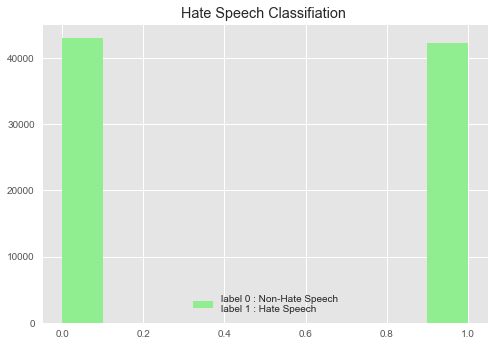

In [371]:
#PLOTTING HISTOGRAM
df['label'].hist(color='lightgreen',histtype ='bar')
plt.legend(["label 0 : Non-Hate Speech\nlabel 1 : Hate Speech"])
plt.title("Hate Speech Classifiation ")
print(df['label'].value_counts())
plt.show()

Text(0.5, 1.0, 'Distribution of Sentiments')

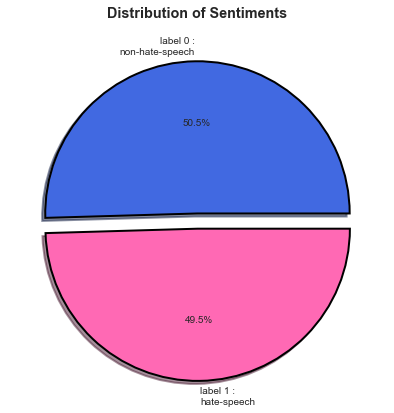

In [372]:
fig = plt.subplots(figsize=(7,7))
colors = ("royalblue","hotpink")
wp = {"linewidth":2,"edgecolor":"black"}
tags = df['label'].value_counts()
explode = (0,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,wedgeprops=wp,explode=explode,labels=['label 0 :\nnon-hate-speech','label 1 :\nhate-speech'],label='')
plt.title('Distribution of Sentiments',fontweight='bold')

In [373]:
non_hate_tweets = df[df.label == 0]
non_hate_tweets.head()

,tweet_length,character_count,lemmatized_final,label
id,,,,
1,55,49,father dysfunctional selfish drag kid dysfunct...,0
2,87,75,thanks lyft credit cant use cause dont offer w...,0
3,14,13,bihday majesty,0
4,15,13,model love take,0
5,29,27,factsguide society motivation,0


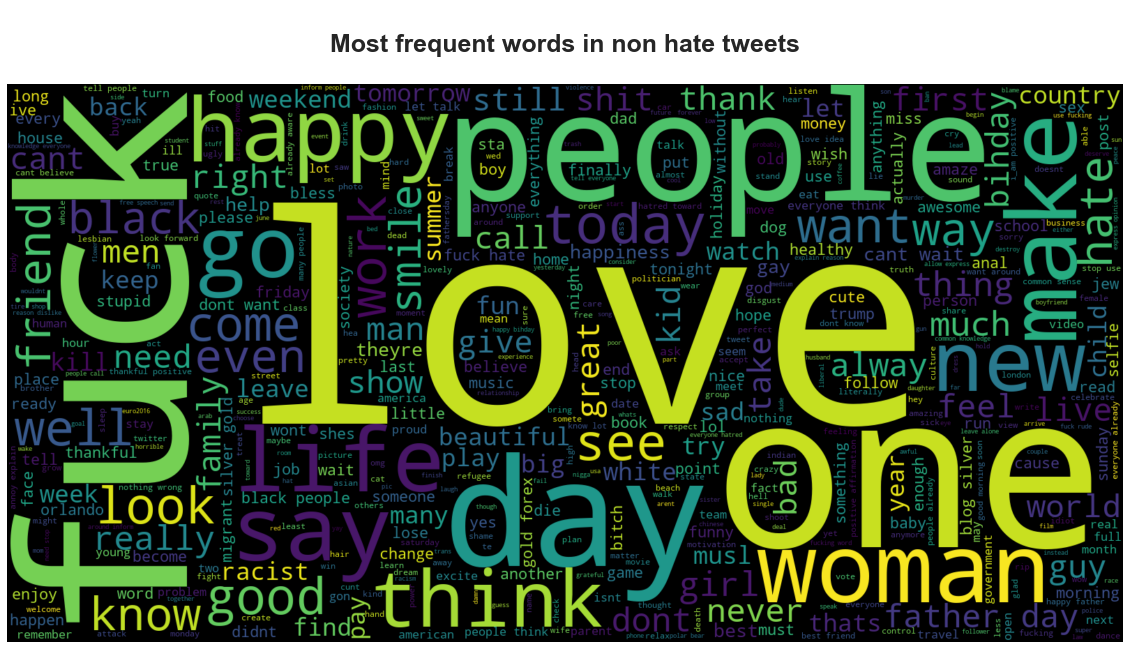

In [374]:
text = ' '.join([word for word in non_hate_tweets['lemmatized_final']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('\nMost frequent words in non hate tweets\n', fontsize = 25,fontweight ="bold")
plt.show()

In [375]:
neg_tweets = df[df.label == 1]
neg_tweets.head()

,tweet_length,character_count,lemmatized_final,label
id,,,,
31964,60,50,mleew17 boy dat coldtyga dwn bad cuffin dat ho...,1
31965,71,62,urkindofbrand dawg rtsbaby4life ever fuck bitc...,1
31966,40,36,c_g_anderson viva_based look like tranny,1
31967,58,50,shenikaroberts shit hear might true might fake...,1
31968,65,57,t_madison_x shit blow mecla faithful somebody ...,1


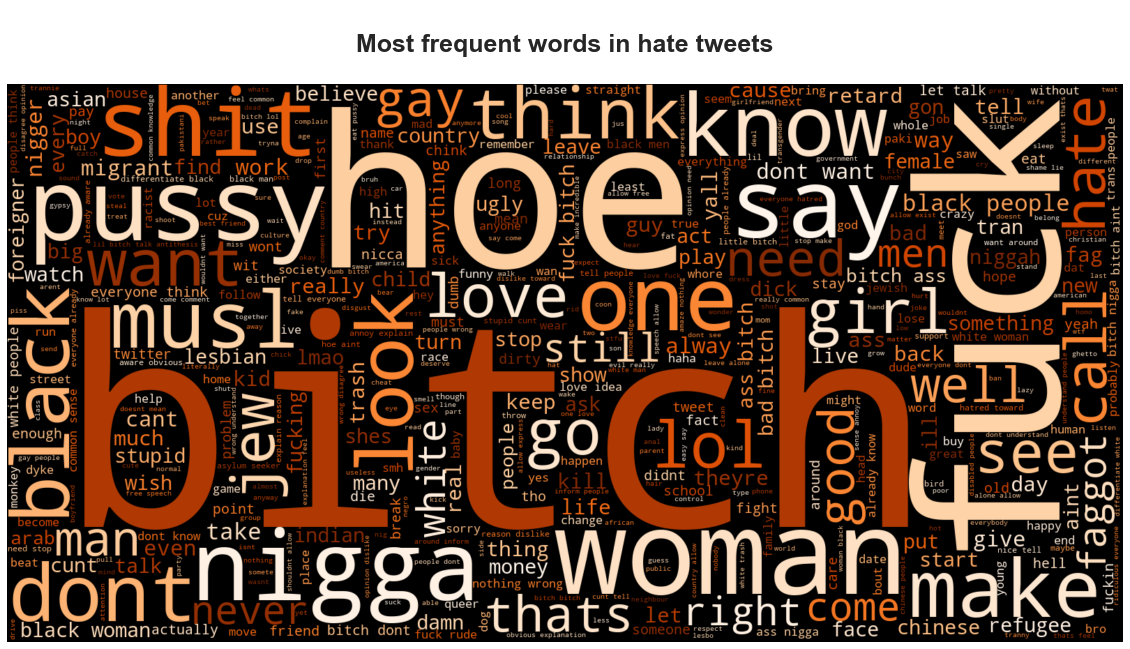

In [376]:
text = ' '.join([word for word in neg_tweets['lemmatized_final']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap="Oranges_r").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('\nMost frequent words in hate tweets\n', fontsize = 25,fontweight='bold')
plt.show()


In [377]:
# replacing n't with not and other features such as 'wan na' as wanna etc
non_hate_tweets['lemmatized_final'] = non_hate_tweets['lemmatized_final'].str.replace("n't", "not")
non_hate_tweets['lemmatized_final'] = non_hate_tweets['lemmatized_final'].str.replace("'ve ", "")
non_hate_tweets['lemmatized_final'] = non_hate_tweets['lemmatized_final'].str.replace("'re", "")
non_hate_tweets['lemmatized_final'] = non_hate_tweets['lemmatized_final'].str.replace("wan na", "wanna")
non_hate_tweets['lemmatized_final'] = non_hate_tweets['lemmatized_final'].str.replace("gon na", "gonna")
# getting rid of single apostrophes
non_hate_tweets['lemmatized_final'] = non_hate_tweets['lemmatized_final'].str.replace(" '", "")
non_hate_tweets['lemmatized_final'] = non_hate_tweets['lemmatized_final'].str.replace("' ", "")
 
non_hate_tweets.head(5)


,tweet_length,character_count,lemmatized_final,label
id,,,,
1,55,49,father dysfunctional selfish drag kid dysfunct...,0
2,87,75,thanks lyft credit cant use cause dont offer w...,0
3,14,13,bihday majesty,0
4,15,13,model love take,0
5,29,27,factsguide society motivation,0


In [378]:

# for the Tweet Tokenizer
from nltk.tokenize import TweetTokenizer

tknz = TweetTokenizer()

def tokenize_tweet(s):
    """
    Tokenize each tweet into a list of words
    """
    tokens = tknz.tokenize(s)
    return [w for w in tokens]



In [379]:
# make new columns for positives with a list of words 
non_hate_tweets['lemmatized_final_tokenize'] =non_hate_tweets[non_hate_tweets ['lemmatized_final'].notna()]['lemmatized_final'].apply(tokenize_tweet)
non_hate_tweets

,tweet_length,character_count,lemmatized_final,label,lemmatized_final_tokenize
id,,,,,
1,55,49,father dysfunctional selfish drag kid dysfunct...,0,"[father, dysfunctional, selfish, drag, kid, dy..."
2,87,75,thanks lyft credit cant use cause dont offer w...,0,"[thanks, lyft, credit, cant, use, cause, dont,..."
3,14,13,bihday majesty,0,"[bihday, majesty]"
4,15,13,model love take,0,"[model, love, take]"
5,29,27,factsguide society motivation,0,"[factsguide, society, motivation]"
...,...,...,...,...,...
75232,28,25,think black violent thief,0,"[think, black, violent, thief]"
75233,23,20,meal disgust wan die,0,"[meal, disgust, wan, die]"
75234,30,27,apartment full rat disgust,0,"[apartment, full, rat, disgust]"


In [380]:
# for the word frequency function
from gensim.corpora import Dictionary
import itertools
from collections import defaultdict
import pandas as pd

In [381]:
def get_tokens_frequency_df(series):
    """
    Count each time the same word appeared in the series and returns a dataFrame
    """
    corpus_lists = [doc for doc in series.dropna() if doc]
    dictionary = Dictionary(corpus_lists)
    corpus_bow = [dictionary.doc2bow(doc) for doc in corpus_lists]
    token_freq_bow = defaultdict(int)
    for token_id, token_sum in itertools.chain.from_iterable(corpus_bow):
        token_freq_bow[token_id] += token_sum

    return pd.DataFrame(list(token_freq_bow.items()), columns=['token_id', 'token_count']).assign(
        token=lambda df1: df1.apply(lambda df2: dictionary.get(df2.token_id), axis=1),
        doc_appeared=lambda df1: df1.apply(lambda df2: dictionary.dfs[df2.token_id], axis=1)).reindex(
        labels=['token_id', 'token', 'token_count', 'doc_appeared'], axis=1).set_index('token_id')


In [382]:
tokens_pos = get_tokens_frequency_df(non_hate_tweets['lemmatized_final_tokenize'])
tokens_pos = tokens_pos.sort_values(by='token_count', ascending = False)
tokens_pos.head(15)


,token,token_count,doc_appeared
token_id,,,
98,people,4464,3877
22,love,3638,3405
34,get,3136,2896
1277,fuck,2889,2701
309,like,2703,2497
81,day,2660,2455
11,dont,2153,1952
51,think,1982,1866
97,make,1872,1727


In [383]:
# replacing n't with not and other features such as 'wan na' as wanna etc
neg_tweets['lemmatized_final'] = neg_tweets['lemmatized_final'].str.replace("n't", "not")
neg_tweets['lemmatized_final'] = neg_tweets['lemmatized_final'].str.replace("'ve ", "")
neg_tweets['lemmatized_final'] = neg_tweets['lemmatized_final'].str.replace("'re", "")
neg_tweets['lemmatized_final'] = neg_tweets['lemmatized_final'].str.replace("wan na", "wanna")
neg_tweets['lemmatized_final'] = neg_tweets['lemmatized_final'].str.replace("gon na", "gonna")
# getting rid of single apostrophes
neg_tweets['lemmatized_final'] = neg_tweets['lemmatized_final'].str.replace(" '", "")
neg_tweets['lemmatized_final'] = neg_tweets['lemmatized_final'].str.replace("' ", "")
 
neg_tweets


,tweet_length,character_count,lemmatized_final,label
id,,,,
31964,60,50,mleew17 boy dat coldtyga dwn bad cuffin dat ho...,1
31965,71,62,urkindofbrand dawg rtsbaby4life ever fuck bitc...,1
31966,40,36,c_g_anderson viva_based look like tranny,1
31967,58,50,shenikaroberts shit hear might true might fake...,1
31968,65,57,t_madison_x shit blow mecla faithful somebody ...,1
...,...,...,...,...
97391,16,15,woman hysterical,1
97392,26,24,forcibly remove foreigner,1
97393,24,22,forcibly remove migrant,1


In [384]:
# make new columns for positives with a list of words 
neg_tweets['lemmatized_final_tokenize'] =neg_tweets[neg_tweets['lemmatized_final'].notna()]['lemmatized_final'].apply(tokenize_tweet)
neg_tweets

,tweet_length,character_count,lemmatized_final,label,lemmatized_final_tokenize
id,,,,,
31964,60,50,mleew17 boy dat coldtyga dwn bad cuffin dat ho...,1,"[mleew, 17, boy, dat, coldtyga, dwn, bad, cuff..."
31965,71,62,urkindofbrand dawg rtsbaby4life ever fuck bitc...,1,"[urkindofbrand, dawg, rtsbaby, 4life, ever, fu..."
31966,40,36,c_g_anderson viva_based look like tranny,1,"[c_g_anderson, viva_based, look, like, tranny]"
31967,58,50,shenikaroberts shit hear might true might fake...,1,"[shenikaroberts, shit, hear, might, true, migh..."
31968,65,57,t_madison_x shit blow mecla faithful somebody ...,1,"[t_madison_x, shit, blow, mecla, faithful, som..."
...,...,...,...,...,...
97391,16,15,woman hysterical,1,"[woman, hysterical]"
97392,26,24,forcibly remove foreigner,1,"[forcibly, remove, foreigner]"
97393,24,22,forcibly remove migrant,1,"[forcibly, remove, migrant]"


In [385]:
tokens_neg = get_tokens_frequency_df(neg_tweets['lemmatized_final_tokenize'])
tokens_neg = tokens_neg.sort_values(by='token_count', ascending = False)
tokens_neg.head(15)

,token,token_count,doc_appeared
token_id,,,
12,bitch,11465,10744
41,get,4929,4479
23,like,4757,4349
821,people,4506,4062
7,hoe,4162,3872
17,fuck,4102,3763
96,dont,3655,3266
688,woman,3515,3049
83,black,3191,2702


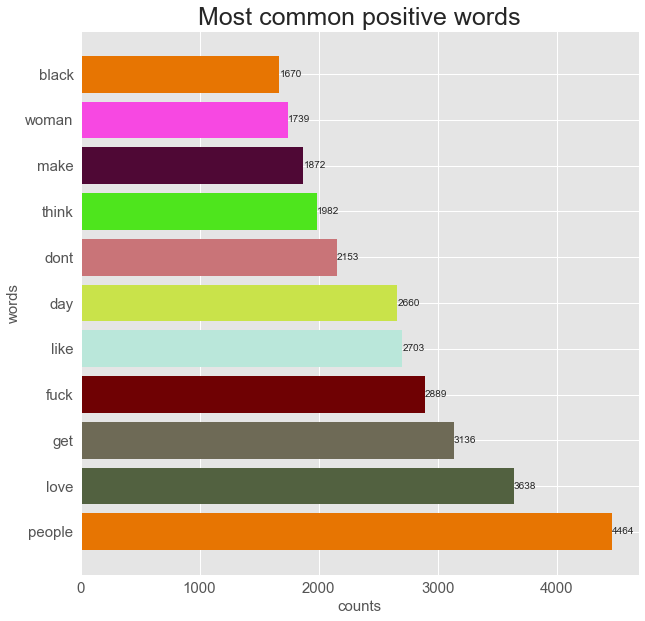

In [386]:
import random
top_10_pos = tokens_pos[:11]
fig, ax = plt.subplots(figsize = (10,10))
ls_color = []
for i in range(10):
    hexadecimal = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
    ls_color.append(hexadecimal)
plt.style.use('seaborn')
bar_num=ax.barh(top_10_pos['token'], top_10_pos['token_count'],color=ls_color,align='center')
# Label with specially formatted floats
plt.bar_label(bar_num, fmt='%.0f')
plt.xlabel('counts', fontsize=15)
plt.ylabel('words',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most common positive words', fontsize=25)

plt.show()

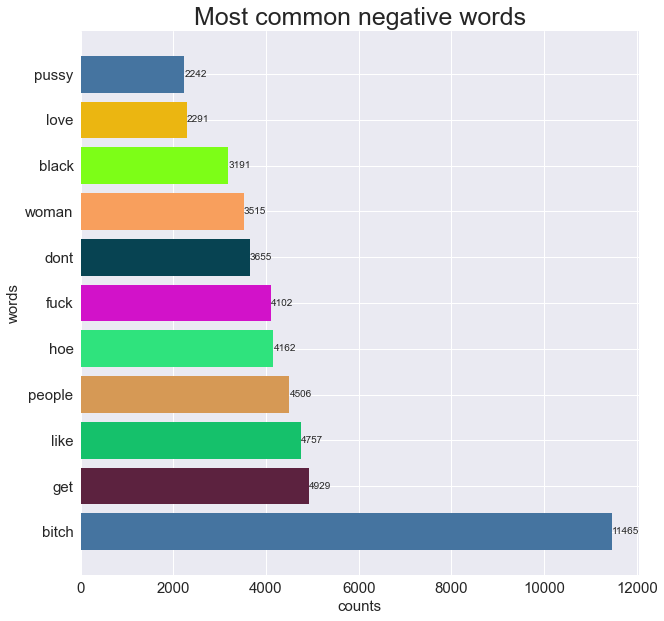

In [387]:
import random
top_10_neg = tokens_neg[:11]
fig, ax = plt.subplots(figsize = (10,10))
ls_color = []
for i in range(10):
    hexadecimal = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
    ls_color.append(hexadecimal)
plt.style.use('seaborn')
bar_num=ax.barh(top_10_neg['token'], top_10_neg['token_count'],color=ls_color,align='center')
# Label with specially formatted floats
plt.bar_label(bar_num, fmt='%.0f')
plt.xlabel('counts', fontsize=15)
plt.ylabel('words',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most common negative words', fontsize=25)

plt.show()

# remove influencing word in Hate or Non-hate speech

In [388]:
df['lemmatized_final'] = df['lemmatized_final'].str.replace("n't", "not")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("'ve ", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("'re", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("wan na", "wanna")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("gon na", "gonna")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("wont", "will not")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("dont", "do not")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("cant", "can not")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("couldnt", "could not")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("doesnt", "does not")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("hadnt", "had not")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("didnt", "did not")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("wouldnt", "would not")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("hasnt", "has not")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("havent", "have not")
# getting rid of single apostrophes
df['lemmatized_final'] = df['lemmatized_final'].str.replace(" '", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("' ", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("see", "") 
df['lemmatized_final'] = df['lemmatized_final'].str.replace("like", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("today", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("make", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("life", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("just", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("your", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("happy", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("get", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("love", "")
df['lemmatized_final'] = df['lemmatized_final'].str.replace("day", "")
df

,tweet_length,character_count,lemmatized_final,label
id,,,,
1,55,49,father dysfunctional selfish drag kid dysfunct...,0
2,87,75,thanks lyft credit can not use cause do not of...,0
3,14,13,bih majesty,0
4,15,13,model take,0
5,29,27,factsguide society motivation,0
...,...,...,...,...
97391,16,15,woman hysterical,1
97392,26,24,forcibly remove foreigner,1
97393,24,22,forcibly remove migrant,1


# Test Train Validate Model


In [389]:
# Text CNN 
import pandas as pd 
import numpy as np 
import re
import pickle

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

test_size  :
This parameter represents the proportion of the dataset that should be included in the test split. The default value for this parameter is set to 0.25, meaning that if we don’t specify the test_size, the resulting split consists of 75% train and 25% test data.

shuffle :
This parameter indicates whether the data should be shuffled before splitting. Since our dataset is ordered by genre, we definitely want to shuffle it. Otherwise the train and test set would not contain the same genres.

 if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

# Vectorizing TF-IDF for Texts in Logistic Regression

Count Vectors can be helpful in understanding the type of text by the frequency of words in it. 
But its major disadvantages are:

Its inability in identifying more important and less important words for analysis.
It will just consider words that are abundant in a corpus as the most statistically significant word.
It also doesn't identify the relationships between words such as linguistic similarity between words.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words.

In [390]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

In [391]:
# instantiate the tf-idf object
tfidf_vectors = TfidfVectorizer(max_df=0.90, min_df=2, max_features=8000, 
                                stop_words='english',
                                ngram_range=(1, 3),binary=True)

In [392]:
tfidf_vectors

TfidfVectorizer(binary=True, max_df=0.9, max_features=8000, min_df=2,
                ngram_range=(1, 3), stop_words='english')

In [393]:
tfidf_only_fit = tfidf_vectors.fit(df['lemmatized_final'])

In [394]:
tfidf_only_fit

TfidfVectorizer(binary=True, max_df=0.9, max_features=8000, min_df=2,
                ngram_range=(1, 3), stop_words='english')

เก็บข้อมูล ได้ด้วยคำสั่ง 
pickle.dump(วัตถุของข้อมูล,open("ชื่อไฟล์ที่ต้องการบันทึก.นามสกุล","wb"))
อ่านไฟล์ ได้ด้วยคำสั่ง 
#pickle.load(open("ชื่อไฟล์ที่บันทึกข้อมูลไว้.นามสกุล", "rb" ) )

In [395]:
# pickling only the fitc เก็บข้อมูล

pickle_out_only_fit = open('tfidf_pickle_fit', 'wb')
pickle.dump(tfidf_only_fit, pickle_out_only_fit)

In [396]:
# fitting and tranforming the matrix for the modelling here
tfidf = tfidf_vectors.fit_transform(df['lemmatized_final'])
tfidf

<85169x8000 sparse matrix of type '<class 'numpy.float64'>'
	with 591441 stored elements in Compressed Sparse Row format>

In [397]:
train1_vector = pd.DataFrame(tfidf.todense(),columns = tfidf_vectors.get_feature_names())
train1_vector

,1nd14ns,_beautifulkeezy,_whiteponyjr_,a8230,aap,ab,abandon,abhorrent,ability,able,...,yung,yup,zebra,zen,zero,zionist,zombie,zone,zoo,zyklon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


train คือโฟลเดอร์ที่ใช้สอน ai ครับ validate คือโฟลเดอร์ที่ใช้ทดสอบ ai ของเรา เหมือนข้อสอบอะ ส่วน test คือโฟลเดอร์ที่ใช้ลอง model ของเรา

In [398]:
df['neg_label'] = df['label'].apply(lambda x :1 )
print(df['neg_label'])

id
1        1
2        1
3        1
4        1
5        1
        ..
97391    1
97392    1
97393    1
97394    1
97395    1
Name: neg_label, Length: 85169, dtype: int64


In [399]:
target=df['neg_label'].astype('int64')
#neg. label = 1

In [400]:
#all rows 0,1
target2 = df['label'].astype('int64')
target2

id
1        0
2        0
3        0
4        0
5        0
        ..
97391    1
97392    1
97393    1
97394    1
97395    1
Name: label, Length: 85169, dtype: int64

In [401]:
#target2 = all rows #train1_vector = split word vectorizer
x_train, x_test, y_train , y_test = train_test_split(train1_vector, target2, 
                                                     test_size =.3, random_state=101, shuffle=True )
                                                 

In [402]:
print(f'The shape of my training set is {x_train.shape}')
print(f'The shape of my training target is {y_train.shape}')
print(f'The shape of my test set is {x_test.shape}')
print(f'The shape of my test target is {y_test.shape}')

The shape of my training set is (59618, 8000)
The shape of my training target is (59618,)
The shape of my test set is (25551, 8000)
The shape of my test target is (25551,)


With shuffle=True you split the data randomly. For example, say that you have balanced binary classification data and it is ordered by labels. If you split it in 80:20 proportions to train and test, your test data would contain only the labels from one class. Random shuffling prevents this.

In [403]:
X_train, x_val, Y_train , y_val = train_test_split(x_train,y_train, test_size =.3, random_state=101, shuffle=True )

In [404]:
print(f'The shape of my final training set is {X_train.shape}')
print(f'The shape of my final training target is {Y_train.shape}')
print(f'The shape of my validation set is {x_val.shape}')
print(f'The shape of my validation target is {y_val.shape}')

The shape of my final training set is (41732, 8000)
The shape of my final training target is (41732,)
The shape of my validation set is (17886, 8000)
The shape of my validation target is (17886,)


# Logistic Regression 


In [405]:
# all models 
from sklearn.linear_model import LogisticRegression

In [406]:
# evaluating performance
from sklearn.metrics import accuracy_score,roc_auc_score, f1_score, recall_score
from sklearn.metrics import  roc_curve, confusion_matrix, precision_score


The best performance is 1 with normalize == True and the number of samples with normalize == False.


In [407]:
def calculate_performance(model , data, target,name):
    
    """ Creates a mini dataframe with all info on the model performance"""
    
    predictions = model.predict(data)
    model_prob = model.predict_proba(data)[:,1]
    
    f1 = f1_score(target, predictions)
    accuracy = accuracy_score(target, predictions)
    roc_score = roc_auc_score(target, model_prob)
    precision = precision_score(target, predictions)
    nameit = str(name)
    score = pd.DataFrame()
    score['model']=pd.Series(nameit)
    score['f1'] = pd.Series(f1)
    score['accuracy'] = pd.Series(accuracy)
    score['roc_score'] = pd.Series(roc_score)
    score['precision'] = pd.Series(precision)
    
    return score

def plot_roc_curve(model, train, validation, y_train, y_val,title):
    
    """Plots the roc curves of two different sets"""
    
    base_pred_train = model.predict_proba(train)[:,1]
    base_fpr_train, base_tpr_train, base_thresh_train = roc_curve(y_train, base_pred_train)

    base_pred_validation = model.predict_proba(validation)[:,1]
    base_fpr_validation, base_tpr_validation, base_thresh_validation = roc_curve(y_val, base_pred_validation)
    
    plt.style.use('seaborn')
    plt.figure(figsize=(12,7))
    ax1 = sns.lineplot(base_fpr_train, base_tpr_train, label='train',)
    ax1.lines[0].set_color("orange")
    ax1.lines[0].set_linewidth(2)

    ax2 = sns.lineplot(base_fpr_validation, base_tpr_validation, label='validaton')
    ax2.lines[1].set_color("yellow")
    ax2.lines[1].set_linewidth(2)

    ax3 = sns.lineplot([0,1], [0,1], label='baseline')
    ax3.lines[2].set_linestyle("--")
    ax3.lines[2].set_color("black")
    ax3.lines[2].set_linewidth(2)

    plt.title(f'\n{title} roc score\n', fontsize=20,fontweight='bold')
    plt.xlabel('FPR : False Positive Rate\n', fontsize=16,fontweight='bold')
    plt.ylabel('TPR : True Positive Rate\n', fontsize=16,fontweight='bold')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.text(x=0.8, y=0.8, s="50-50 guess", fontsize=14,
    bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"))

    plt.legend(loc=4, fontsize=17)
    plt.show();
    

In [408]:
logmod = LogisticRegression(random_state=1002)

print(Y_train[0:10])
print(np.sum(Y_train))
import os
path='C:\\Users\\User\\Desktop\\DataSCI_ML_project\\'
Y_train.to_csv(os.path.join(path,r'ytard.csv'))
if np.sum(Y_train) in [len(Y_train),0]:
    print ("only one class")
    #do something else
else:
    #OK to proceed
    print(logmod.fit(X_train, Y_train))
    y_pred = logmod.predict(x_test)

id
2854     0
39990    1
83620    1
55088    1
27613    0
21445    0
4238     0
76720    1
68172    0
43095    1
Name: label, dtype: int64
20640
LogisticRegression(random_state=1002)


In [409]:
print('accuracy score : {}'.format(accuracy_score(y_test, y_pred,normalize=True)))

accuracy score : 0.8511995616609918


In [410]:
#def calculate_performance(model , data, target, str):
Logistic_Reg_Training=calculate_performance(logmod, X_train, Y_train, 'Logistic Regression Training')
Logistic_Reg_Training  

,model,f1,accuracy,roc_score,precision
0,Logistic Regression Training,0.875003,0.878582,0.949838,0.89134


In [411]:
#def plot_roc_curve(model, train, validation, y_train, y_val,str):
Logistic_Reg_Validation=calculate_performance(logmod, x_val, y_val, 'Logistic Regression Validation')
Logistic_Reg_Validation   

,model,f1,accuracy,roc_score,precision
0,Logistic Regression Validation,0.843835,0.848541,0.92788,0.866051


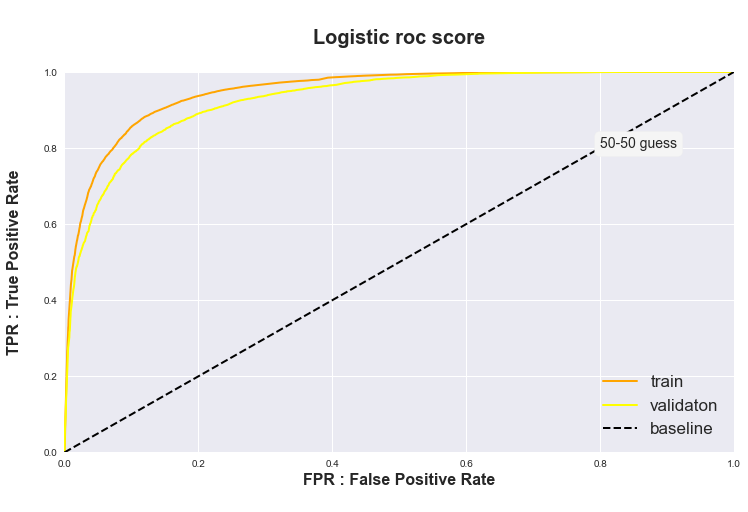

In [412]:
plot_roc_curve(logmod, X_train, x_val, Y_train, y_val, "Logistic" )

A better approach is to objectively search different values for model hyperparameters and choose a subset that results in a model that achieves the best performance on a given dataset. This is called hyperparameter optimization or hyperparameter tuning and is available in the scikit-learn Python machine learning library.

In [413]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle= True, random_state=102)

In [414]:
param_grid = {'C': [0.01,0.1,1,10,100]}
opt_model = GridSearchCV(LogisticRegression(class_weight = 'balanced', 
                                            random_state = 15 
                                            ),
                         param_grid,
                         cv=skf,
                         return_train_score=True,
                         scoring= 'accuracy')

In [415]:
opt_model.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=102, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=15),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='accuracy')

In [416]:
print('Values of the optimised hyperparameters\nfor the best model found:\n',opt_model.best_params_)
opt_model.best_score_

Values of the optimised hyperparameters
for the best model found:
 {'C': 10}


0.8439326971446143

In [417]:
Logistic_Reg_Training_Opt = calculate_performance(opt_model, X_train, Y_train, 'Logistic Regression Training Optimised')
Logistic_Reg_Training_Opt

,model,f1,accuracy,roc_score,precision
0,Logistic Regression Training Optimised,0.903472,0.904869,0.965374,0.906824


In [418]:
Logistic_Reg_Validation_Opt = calculate_performance(opt_model, x_val, y_val, 'Logistic Regression Validation Optimised')
Logistic_Reg_Validation_Opt 

,model,f1,accuracy,roc_score,precision
0,Logistic Regression Validation Optimised,0.846748,0.848093,0.925566,0.849768


In [419]:
y_log = opt_model.predict(x_val)
# confusion matrix for the validation set
x=confusion_matrix(y_val, y_log)
x

array([[7663, 1327],
       [1390, 7506]], dtype=int64)

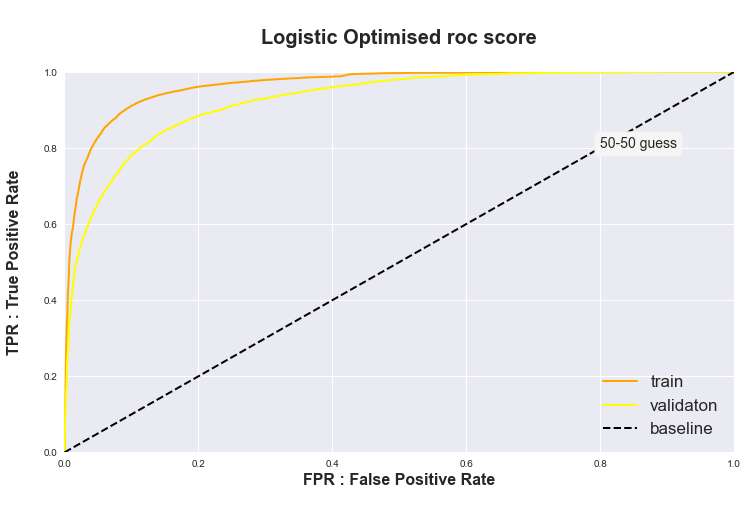

In [420]:
plot_roc_curve(opt_model, X_train, x_val, Y_train, y_val, "Logistic Optimised" )

In [421]:
# concatenating all the results into a larger df
evaluation = pd.concat([Logistic_Reg_Training_Opt, 
                    Logistic_Reg_Validation_Opt,
                    Logistic_Reg_Training,
                    Logistic_Reg_Validation])
evaluation                 

,model,f1,accuracy,roc_score,precision
0,Logistic Regression Training Optimised,0.903472,0.904869,0.965374,0.906824
0,Logistic Regression Validation Optimised,0.846748,0.848093,0.925566,0.849768
0,Logistic Regression Training,0.875003,0.878582,0.949838,0.891340
0,Logistic Regression Validation,0.843835,0.848541,0.927880,0.866051


In [422]:
# instatiating Logistic Regression with the best params C = 10
log_best = LogisticRegression(C = 10, random_state=1006)
log_best.fit(X_train, Y_train)

LogisticRegression(C=10, random_state=1006)

In [423]:
eff = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(log_best.coef_))], axis = 1)
eff.columns=['word', 'coef']
eff.sort_values(by='coef', ascending=False, inplace=True)
eff = eff[:26]
eff.reset_index()

,index,word,coef
0,3343,hoe,22.157945
1,683,bitch,21.105724
2,5549,pussy,13.464374
3,5828,retard,12.576885
4,2439,faggot,10.773762
5,4665,nicca,9.632975
6,4708,nigger,8.659688
7,3800,kike,8.559157
8,7158,trannies,8.493489
9,4684,nig,8.262456


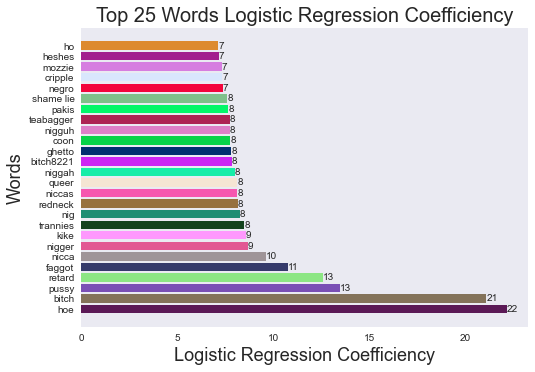

In [424]:
#แกน y words แกน x Logistic Regression Coefficiency
#plt.figure(figsize=(12,16))

ls_color = []

for i in range(len(eff["word"])):
    hexadecimal = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
    ls_color.append(hexadecimal)

bar_num = plt.barh(eff['word'],eff['coef'],height = 0.8,color = ls_color,align = 'center')

plt.xlabel("Logistic Regression Coefficiency",fontsize = 18)
plt.ylabel("Words",fontsize = 18)
plt.title("Top 25 Words Logistic Regression Coefficiency",fontsize = 20)
plt.grid()
# Label with specially formatted floats
plt.bar_label(bar_num, fmt='%.0f')
plt.show()

# check model 

In [425]:
x_test.columns.values

array(['1nd14ns', '_beautifulkeezy', '_whiteponyjr_', ..., 'zone', 'zoo',
       'zyklon'], dtype=object)

In [426]:
y_test.values

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [427]:
x_train.columns.values

array(['1nd14ns', '_beautifulkeezy', '_whiteponyjr_', ..., 'zone', 'zoo',
       'zyklon'], dtype=object)

In [428]:
y_train.values

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [429]:
X_train.columns.values

array(['1nd14ns', '_beautifulkeezy', '_whiteponyjr_', ..., 'zone', 'zoo',
       'zyklon'], dtype=object)

In [430]:
y_log = log_best.predict(x_test)
cm = confusion_matrix(y_test, y_log)
calculate_performance(log_best, x_test, y_test, 'Test Set Logistic Regression Best Model')


,model,f1,accuracy,roc_score,precision
0,Test Set Logistic Regression Best Model,0.847282,0.850378,0.92879,0.856831


In [431]:
log_best

LogisticRegression(C=10, random_state=1006)

In [432]:

dump(log_best, 'final_model.sav')

['final_model.sav']